# Made by Kyrylo Krocha

### Some imports

In [3]:
#!conda list freetype 
#freetype version should be 2.10.4, otherwise kernel can die when plotting

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Data/site_data_csv.csv', delimiter=';')

In [6]:
data.head()

,date,country,source,campaign,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you,Unnamed: 12
0,5-Feb-18,Australia,facebook,el_21,80,40,20,15,7,2,0,0,NaN
1,5-Feb-18,Canada,facebook,el_21,443,336,25,25,24,4,2,2,NaN
2,5-Feb-18,New Zealand,facebook,el_21,20,18,4,3,2,1,0,0,NaN
3,5-Feb-18,United Kingdom,facebook,el_21,320,108,44,42,40,9,3,3,NaN
4,5-Feb-18,United States,facebook,el_21,1575,1330,394,250,140,14,6,5,NaN


In [7]:
data.describe()

,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you,Unnamed: 12
count,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,0.0
mean,3033.179093,2963.620118,2848.639842,2751.892209,2573.147041,901.224852,181.662722,162.611144,NaN
std,2436.158773,2416.112490,2389.959800,2336.976851,2230.711433,1048.259785,268.082605,241.800852,NaN
min,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,906.000000,863.750000,784.000000,738.000000,681.000000,136.000000,14.000000,12.000000,NaN
50%,2216.500000,2107.500000,1948.000000,1885.500000,1768.000000,486.000000,70.000000,62.000000,NaN
75%,5097.500000,5010.000000,4869.000000,4684.000000,4332.000000,1302.250000,230.000000,204.000000,NaN
max,8141.000000,8102.000000,7985.000000,7965.000000,7952.000000,5396.000000,2028.000000,1924.000000,NaN


### Cleaning the data

In [9]:
data.columns

Index(['date', 'country', 'source', 'campaign', 'homepage', 'registration ',
       'consultation', 'product', 'Is_sub', 'delivery', 'Payment', 'Thank_you',
       'Unnamed: 12'],
      dtype='object')

In [10]:
data = data.drop(columns= ['Unnamed: 12'])

In [11]:
data

,date,country,source,campaign,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
0,5-Feb-18,Australia,facebook,el_21,80,40,20,15,7,2,0,0
1,5-Feb-18,Canada,facebook,el_21,443,336,25,25,24,4,2,2
2,5-Feb-18,New Zealand,facebook,el_21,20,18,4,3,2,1,0,0
3,5-Feb-18,United Kingdom,facebook,el_21,320,108,44,42,40,9,3,3
4,5-Feb-18,United States,facebook,el_21,1575,1330,394,250,140,14,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10135,23-Jul-18,Australia,organic,NaN,4917,4869,4860,4845,4831,338,95,76
10136,23-Jul-18,Canada,organic,NaN,7139,6952,6817,6707,6666,4333,1083,942
10137,23-Jul-18,New Zealand,organic,NaN,6161,6081,5218,4949,4674,982,108,99
10138,23-Jul-18,United Kingdom,organic,NaN,2604,2596,2583,2571,2560,77,2,2


# Actual analysis

## Calculating dropout percentage for each stage

In [14]:
data.columns

Index(['date', 'country', 'source', 'campaign', 'homepage', 'registration ',
       'consultation', 'product', 'Is_sub', 'delivery', 'Payment',
       'Thank_you'],
      dtype='object')

### Selecting only numeric data

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include=numerics)

In [17]:
numeric_data.head()

,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
0,80,40,20,15,7,2,0,0
1,443,336,25,25,24,4,2,2
2,20,18,4,3,2,1,0,0
3,320,108,44,42,40,9,3,3
4,1575,1330,394,250,140,14,6,5


In [18]:
list_of_numeric_cols = numeric_data.columns
list_of_numeric_cols = list(list_of_numeric_cols)

In [19]:
def calculate_dropout_percentage(mean_1, mean_2):
    percent = (mean_2*100)/mean_1
    return 100-percent

In [20]:
list_of_means = []
for i in range(len(list_of_numeric_cols)):
    list_of_means.append(numeric_data[list_of_numeric_cols[i]].mean())
list_of_means

[3033.17909270217,
 2963.6201183431954,
 2848.639842209073,
 2751.8922090729784,
 2573.1470414201185,
 901.2248520710059,
 181.66272189349112,
 162.61114398422092]

In [21]:
dropout_percent = [] #list of dropout percentages
for i in range(len(list_of_means)-1):
    dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
dropout_percent

[2.2932696103020476,
 3.879723835806672,
 3.396274660719058,
 6.495354980240066,
 64.97577334042984,
 79.84268615362393,
 10.487334831655858]

In [22]:
list_of_numeric_cols

['homepage',
 'registration ',
 'consultation',
 'product',
 'Is_sub',
 'delivery',
 'Payment',
 'Thank_you']

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,"{:.1f}".format(y[i])+' %', ha = 'center', fontweight='bold')

Text(0.5, 0, 'Stages of Funneling')

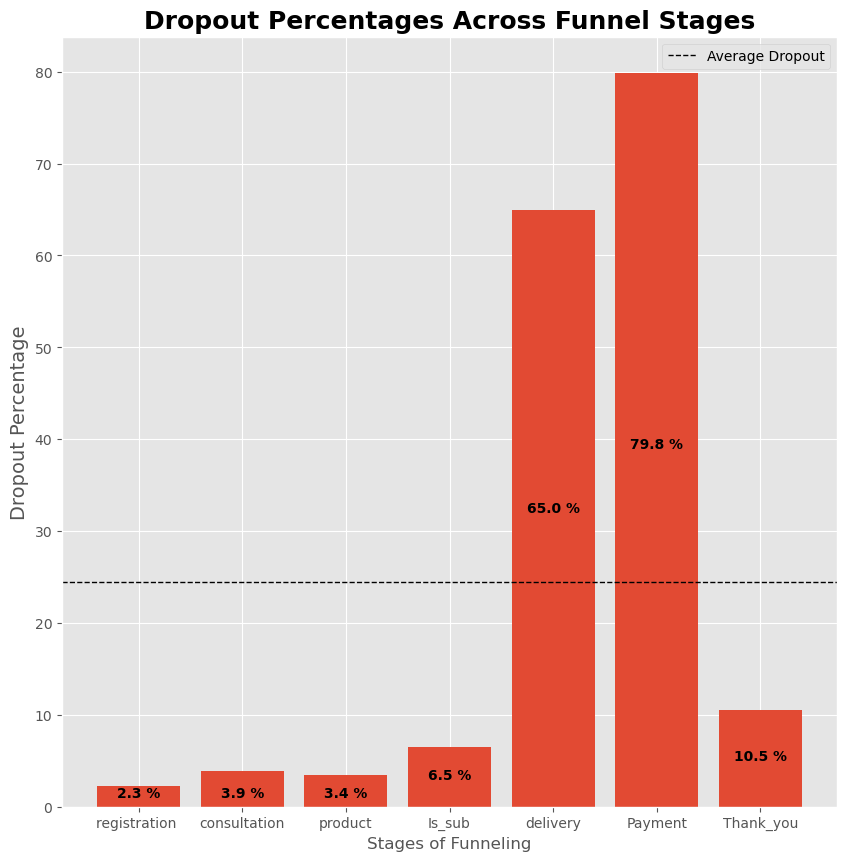

In [24]:
dropout_percent = np.transpose(dropout_percent)
stages=[]
for i in range(1, len(dropout_percent)+1):
    stages.append(i)
#plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.bar(np.transpose(list_of_numeric_cols[1:8]),dropout_percent)
addlabels(np.transpose(stages),dropout_percent)
plt.title('Dropout Percentages Across Funnel Stages', fontsize=18, fontweight='bold')
avg_dropout = sum(dropout_percent) / len(dropout_percent)
plt.axhline(avg_dropout, color='black', linestyle='--', linewidth=1, label='Average Dropout')
plt.legend(fontsize=10)

plt.ylabel('Dropout Percentage',fontsize=14)
plt.xlabel('Stages of Funneling')

In [25]:
dropout_percent[4], dropout_percent[5] 

(64.97577334042984, 79.84268615362393)

The highest dropout rates are on stages of entering delivery information and payment details, which suggests that user interface on this stages are not understandable, or users are too overwhelmed with the number of questions, so maybe simplifying UI is a good idea. Also, adding more payment methods should also improve our system.

## Source/Campaign dropout analysis

In [28]:
organic_data = data[data['campaign'].isna()]
organic_data.describe()

,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
count,3380.000000,3380.000000,3380.000000,3380.000000,3380.000000,3380.000000,3380.000000,3380.000000
mean,4017.870414,3954.904438,3894.876036,3773.024556,3533.901775,1232.910947,249.302959,224.884320
std,2315.759998,2282.403922,2256.184734,2212.046268,2146.224732,1138.188803,304.020191,274.575291
min,100.000000,99.000000,97.000000,81.000000,76.000000,0.000000,0.000000,0.000000
25%,1978.250000,1952.750000,1916.750000,1825.750000,1691.750000,317.750000,35.000000,32.000000
50%,3987.000000,3919.500000,3868.500000,3737.500000,3382.500000,871.000000,132.000000,118.000000
75%,6039.000000,5916.750000,5782.750000,5635.000000,5231.500000,1863.000000,352.250000,318.250000
max,7996.000000,7987.000000,7981.000000,7965.000000,7952.000000,5396.000000,1971.000000,1786.000000


In [29]:
list_of_means = []
for i in range(len(list_of_numeric_cols)):
    list_of_means.append(organic_data[list_of_numeric_cols[i]].mean())
list_of_means

[4017.8704142011834,
 3954.9044378698227,
 3894.8760355029585,
 3773.0245562130176,
 3533.901775147929,
 1232.9109467455621,
 249.30295857988165,
 224.88431952662722]

In [30]:
dropout_percent = [] #list of dropout percentages
for i in range(len(list_of_means)-1):
    dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
dropout_percent

[1.5671480122606027,
 1.517821816175072,
 3.1285072536129093,
 6.3376947990260675,
 65.11190674806029,
 79.77932151239706,
 9.794765049059862]

Text(0.5, 0, 'stages of funelling')

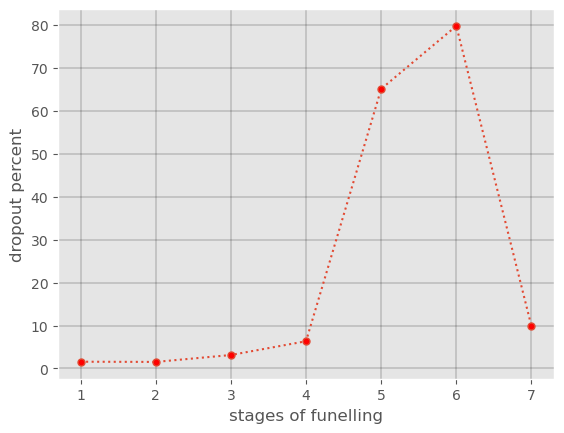

In [31]:
dropout_percent = np.transpose(dropout_percent)
list_of_numeric_cols = np.transpose(list_of_numeric_cols)
stages=[]
for i in range(1, len(dropout_percent)+1):
    stages.append(i)
plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.ylabel('dropout percent')
plt.xlabel('stages of funelling')

In [32]:
campaign_data = data[data['campaign'].notna()]
campaign_data.describe()

,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
count,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000
mean,2540.833432,2467.977959,2325.521746,2241.326036,2092.769675,735.381805,147.842604,131.474556
std,2344.023800,2327.109846,2280.876368,2228.056033,2114.069331,958.221870,241.181533,217.040765
min,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,661.750000,630.000000,548.000000,507.000000,457.750000,84.000000,9.000000,8.000000
50%,1603.000000,1528.000000,1388.000000,1333.500000,1260.500000,351.000000,51.000000,44.000000
75%,4245.500000,4164.000000,3874.750000,3720.250000,3412.750000,958.000000,170.250000,151.000000
max,8141.000000,8102.000000,7985.000000,7957.000000,7918.000000,5178.000000,2028.000000,1924.000000


In [33]:
list_of_means = []
for i in range(len(list_of_numeric_cols)):
    list_of_means.append(campaign_data[list_of_numeric_cols[i]].mean())
list_of_means

[2540.8334319526625,
 2467.9779585798815,
 2325.52174556213,
 2241.326035502959,
 2092.769674556213,
 735.3818047337278,
 147.84260355029585,
 131.47455621301776]

In [34]:
dropout_percent = [] #list of dropout percentages
for i in range(len(list_of_means)-1):
    dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
dropout_percent

[2.86738486894005,
 5.772183358546826,
 3.6205083964424176,
 6.628056721493877,
 64.8608342487727,
 79.89580343182033,
 11.071265619121547]

Text(0.5, 0, 'stages of funelling')

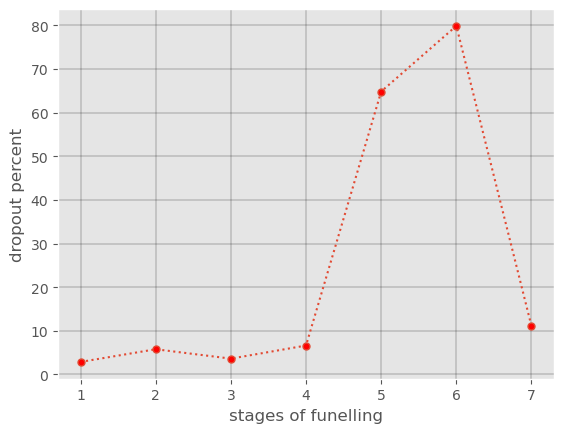

In [35]:
dropout_percent = np.transpose(dropout_percent)
list_of_numeric_cols = np.transpose(list_of_numeric_cols)
stages=[]
for i in range(1, len(dropout_percent)+1):
    stages.append(i)
plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.ylabel('dropout percent')
plt.xlabel('stages of funelling')

## Checking if there are disparities in dropout betweeen countries 

In [37]:
list_of_countries = list(data['country'].unique())
list_of_countries

['Australia', 'Canada', 'New Zealand', 'United Kingdom', 'United States']

In [38]:
country_data = data[data['country'] == list_of_countries[0]]
country_data

,date,country,source,campaign,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
0,5-Feb-18,Australia,facebook,el_21,80,40,20,15,7,2,0,0
5,6-Feb-18,Australia,facebook,el_21,472,350,83,39,36,17,3,3
10,7-Feb-18,Australia,facebook,el_21,569,340,139,60,41,28,8,8
15,8-Feb-18,Australia,facebook,el_21,546,398,52,43,36,7,0,0
20,9-Feb-18,Australia,facebook,el_21,543,476,52,47,30,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10115,19-Jul-18,Australia,organic,NaN,115,112,105,105,105,24,0,0
10120,20-Jul-18,Australia,organic,NaN,1899,1898,1898,1897,1890,1058,190,182
10125,21-Jul-18,Australia,organic,NaN,3797,3796,3791,3791,3786,757,106,94
10130,22-Jul-18,Australia,organic,NaN,5476,5463,5462,5462,4882,3124,1000,960


In [39]:
list_of_means = []
for i in range(len(list_of_numeric_cols)):
    list_of_means.append(country_data[list_of_numeric_cols[i]].mean())
list_of_means

[3068.7460552268244,
 3008.784023668639,
 2910.1237672583825,
 2815.190828402367,
 2632.5877712031556,
 932.8175542406311,
 187.5749506903353,
 167.83579881656806]

In [40]:
dropout_percent = [] #list of dropout percentages
for i in range(len(list_of_means)-1):
    dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
dropout_percent

[1.9539587336024482,
 3.279074058960177,
 3.2621615590408766,
 6.486347403413475,
 64.56651647309327,
 79.89157152568463,
 10.52334109704995]

Text(0.5, 0, 'stages of funelling')

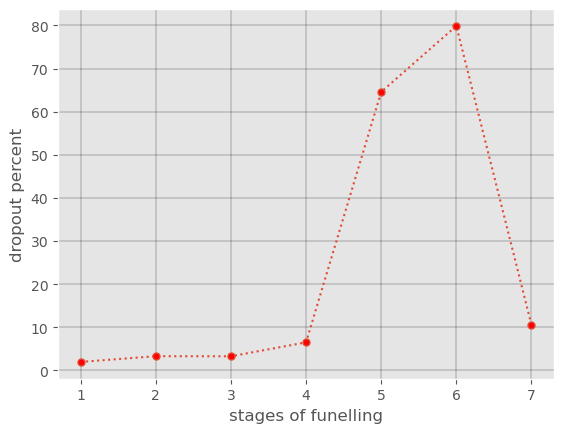

In [41]:
dropout_percent = np.transpose(dropout_percent)
list_of_numeric_cols = np.transpose(list_of_numeric_cols)
stages=[]
for i in range(1, len(dropout_percent)+1):
    stages.append(i)
plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.ylabel('dropout percent')
plt.xlabel('stages of funelling')

There are almost no disparity betweeen countries, so dropout increase on 5th and 6th stage is not caused by language barrier

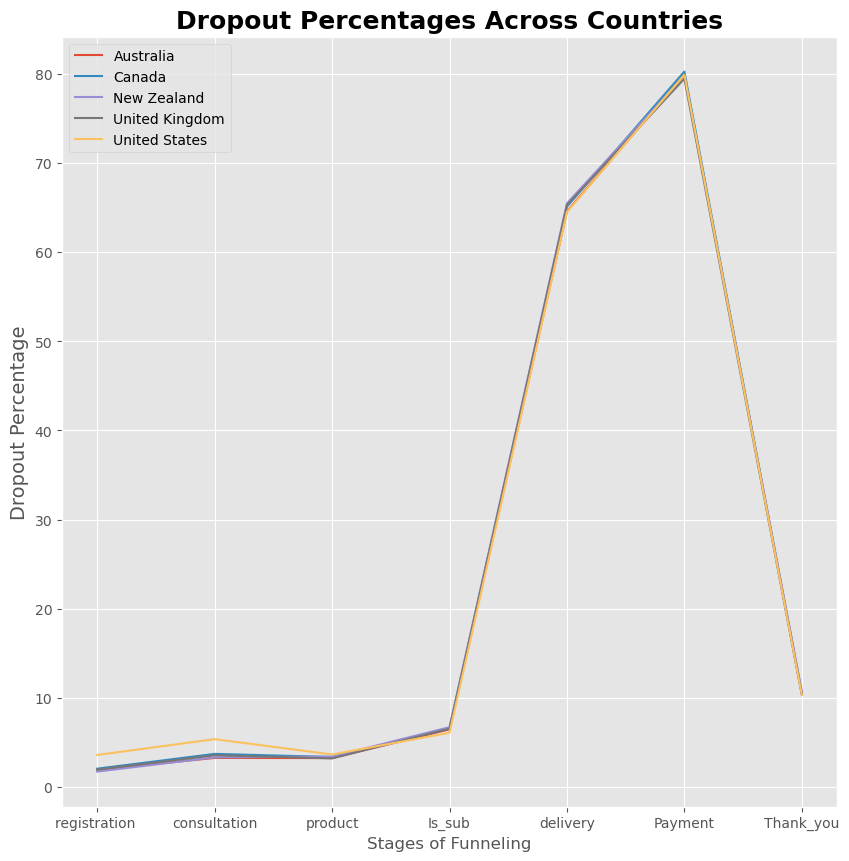

In [46]:
plt.figure(figsize=(10,10))
for i in range(len(list_of_countries)):
    country_data = data[data['country'] == list_of_countries[i]]
    list_of_means = []
    dropout_percent = [] #list of dropout percentages
    for j in range(len(list_of_numeric_cols)):
        list_of_means.append(country_data[list_of_numeric_cols[j]].mean())

    for k in range(len(list_of_means)-1):
        dropout_percent.append(calculate_dropout_percentage(list_of_means[k],list_of_means[k+1]))
    plt.plot(np.transpose(list_of_numeric_cols[1:8]),dropout_percent, label = list_of_countries[i])






#addlabels(np.transpose(stages),dropout_percent)
plt.title('Dropout Percentages Across Countries', fontsize=18, fontweight='bold')
avg_dropout = sum(dropout_percent) / len(dropout_percent)
#plt.axhline(avg_dropout, color='black', linestyle='--', linewidth=1, label='Average Dropout')
plt.legend(fontsize=10)

plt.ylabel('Dropout Percentage',fontsize=14)
plt.xlabel('Stages of Funneling')
plt.show()

## Campaigns effectivness analysis

In [49]:
campaigns = list(campaign_data['campaign'].unique())
campaigns

['el_21', 'el_31', 'el_41', 'el_51', 'sd_21', 'sd_31', 'sd_41', 'sd_51']

In [51]:
camp_data = data[data['campaign'] == campaigns[0]]
camp_data

,date,country,source,campaign,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
0,5-Feb-18,Australia,facebook,el_21,80,40,20,15,7,2,0,0
1,5-Feb-18,Canada,facebook,el_21,443,336,25,25,24,4,2,2
2,5-Feb-18,New Zealand,facebook,el_21,20,18,4,3,2,1,0,0
3,5-Feb-18,United Kingdom,facebook,el_21,320,108,44,42,40,9,3,3
4,5-Feb-18,United States,facebook,el_21,1575,1330,394,250,140,14,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8249,14-Jun-18,Australia,facebook,el_21,321,184,87,86,74,46,1,1
8250,14-Jun-18,Canada,facebook,el_21,367,152,105,101,94,19,5,4
8251,14-Jun-18,New Zealand,facebook,el_21,38,27,10,10,10,6,0,0
8252,14-Jun-18,United Kingdom,facebook,el_21,267,196,106,89,82,0,0,0


In [53]:
list_of_means = []
for i in range(len(list_of_numeric_cols)):
    list_of_means.append(camp_data[list_of_numeric_cols[i]].mean())
list_of_means

[740.9763313609468,
 497.10532544378697,
 199.82011834319528,
 163.3680473372781,
 124.73609467455621,
 44.87692307692308,
 8.411834319526628,
 7.579881656804734]

In [55]:
dropout_percent = [] #list of dropout percentages
for i in range(len(list_of_means)-1):
    dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
dropout_percent

[32.912118187262934,
 59.8032633899451,
 18.24244290723017,
 23.647190067079094,
 64.02250431680613,
 81.25576857150392,
 9.8902644907147]

Text(0.5, 0, 'stages of funelling')

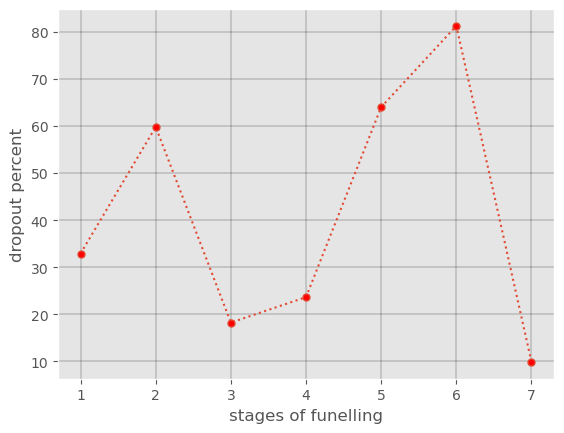

In [57]:
dropout_percent = np.transpose(dropout_percent)
list_of_numeric_cols = np.transpose(list_of_numeric_cols)
stages=[]
for i in range(1, len(dropout_percent)+1):
    stages.append(i)
plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.ylabel('dropout percent')
plt.xlabel('stages of funelling')

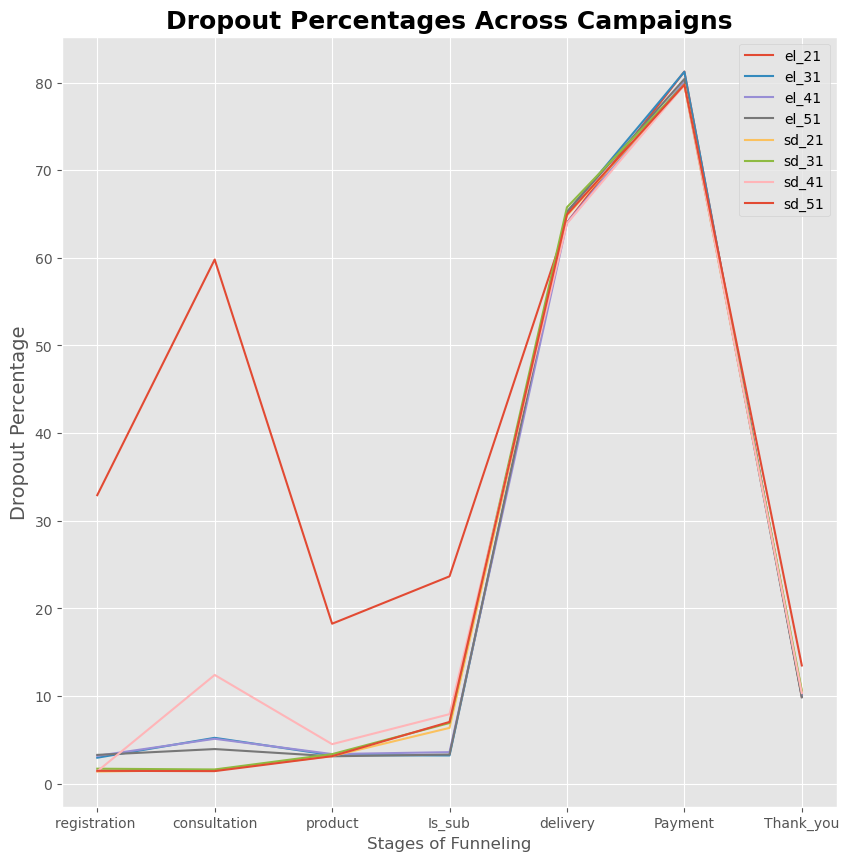

In [59]:
plt.figure(figsize=(10,10))
for i in range(len(campaigns)):
    camp_data = data[data['campaign'] == campaigns[i]]
    list_of_means = []
    dropout_percent = [] #list of dropout percentages
    for j in range(len(list_of_numeric_cols)):
        list_of_means.append(camp_data[list_of_numeric_cols[j]].mean())

    for k in range(len(list_of_means)-1):
        dropout_percent.append(calculate_dropout_percentage(list_of_means[k],list_of_means[k+1]))
    plt.plot(np.transpose(list_of_numeric_cols[1:8]),dropout_percent, label = campaigns[i])






#addlabels(np.transpose(stages),dropout_percent)
plt.title('Dropout Percentages Across Campaigns', fontsize=18, fontweight='bold')
avg_dropout = sum(dropout_percent) / len(dropout_percent)
#plt.axhline(avg_dropout, color='black', linestyle='--', linewidth=1, label='Average Dropout')
plt.legend(fontsize=10)

plt.ylabel('Dropout Percentage',fontsize=14)
plt.xlabel('Stages of Funneling')
plt.show()

## Source effectivness analysis

In [62]:
sources = list(data['source'].unique())
sources

['facebook', 'google', 'organic']

In [64]:
source_data = data[data['source'] == sources[0]]
source_data

,date,country,source,campaign,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
0,5-Feb-18,Australia,facebook,el_21,80,40,20,15,7,2,0,0
1,5-Feb-18,Canada,facebook,el_21,443,336,25,25,24,4,2,2
2,5-Feb-18,New Zealand,facebook,el_21,20,18,4,3,2,1,0,0
3,5-Feb-18,United Kingdom,facebook,el_21,320,108,44,42,40,9,3,3
4,5-Feb-18,United States,facebook,el_21,1575,1330,394,250,140,14,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8264,14-Jun-18,Australia,facebook,el_51,1897,1859,1854,1843,1843,977,244,227
8265,14-Jun-18,Canada,facebook,el_51,337,335,333,308,307,80,14,12
8266,14-Jun-18,New Zealand,facebook,el_51,1162,1067,1019,961,945,302,72,60
8267,14-Jun-18,United Kingdom,facebook,el_51,838,824,817,816,816,506,15,13


In [66]:
list_of_means = []
for i in range(len(list_of_numeric_cols)):
    list_of_means.append(source_data[list_of_numeric_cols[i]].mean())
list_of_means

[949.2263313609468,
 864.3674556213018,
 754.8653846153846,
 722.9449704142012,
 690.3260355029586,
 243.1346153846154,
 47.15147928994083,
 42.448816568047334]

In [68]:
dropout_percent = [] #list of dropout percentages
for i in range(len(list_of_means)-1):
    dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
dropout_percent

[8.939793696828787,
 12.668462966043506,
 4.228623387923307,
 4.511952672214335,
 64.77974132795498,
 80.60684233902616,
 9.973521070200547]

Text(0.5, 0, 'stages of funelling')

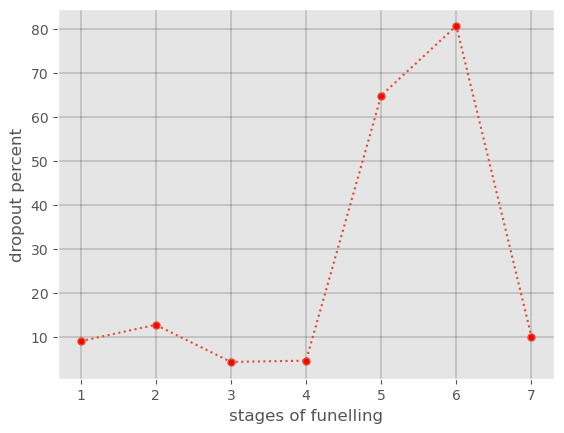

In [70]:
dropout_percent = np.transpose(dropout_percent)
list_of_numeric_cols = np.transpose(list_of_numeric_cols)
stages=[]
for i in range(1, len(dropout_percent)+1):
    stages.append(i)
plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.ylabel('dropout percent')
plt.xlabel('stages of funelling')

There is significant increase of dropoff on early stages from facebook, especially on el_21 campaign, hinting that there is a problem with consistency between ad content and landing page expectations. So improving this might be good for funnel conversion

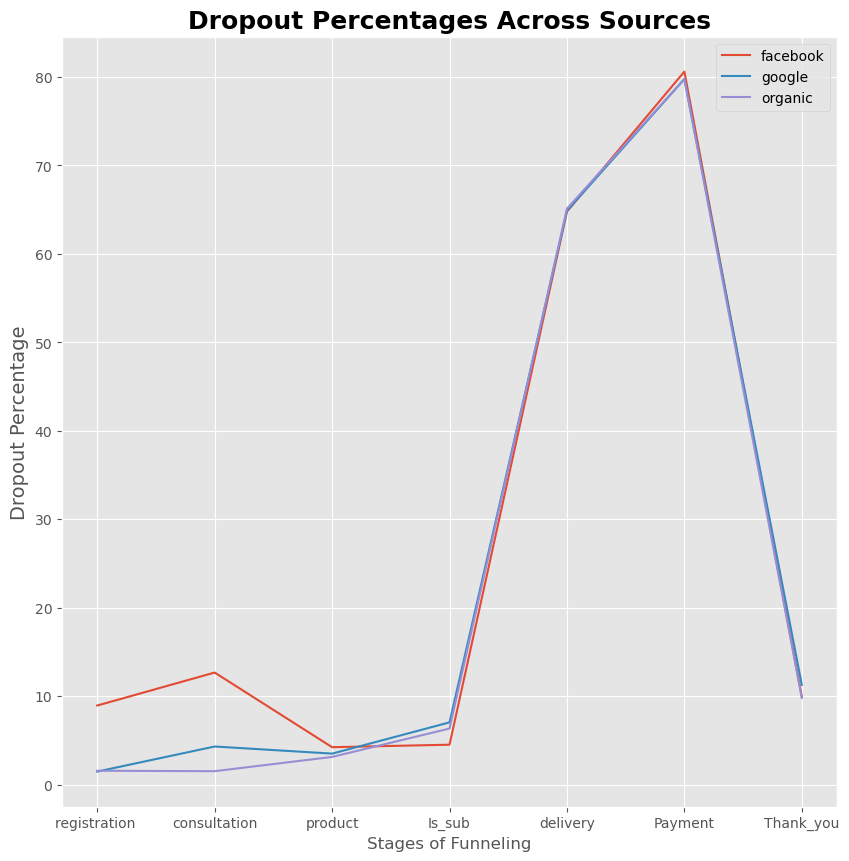

In [73]:
plt.figure(figsize=(10,10))
for i in range(len(sources)):
    source_data = data[data['source'] == sources[i]]
    list_of_means = []
    dropout_percent = [] #list of dropout percentages
    for j in range(len(list_of_numeric_cols)):
        list_of_means.append(source_data[list_of_numeric_cols[j]].mean())

    for k in range(len(list_of_means)-1):
        dropout_percent.append(calculate_dropout_percentage(list_of_means[k],list_of_means[k+1]))
    plt.plot(np.transpose(list_of_numeric_cols[1:8]),dropout_percent, label = sources[i])






#addlabels(np.transpose(stages),dropout_percent)
plt.title('Dropout Percentages Across Sources', fontsize=18, fontweight='bold')
avg_dropout = sum(dropout_percent) / len(dropout_percent)
#plt.axhline(avg_dropout, color='black', linestyle='--', linewidth=1, label='Average Dropout')
plt.legend(fontsize=10)

plt.ylabel('Dropout Percentage',fontsize=14)
plt.xlabel('Stages of Funneling')
plt.show()

In [75]:
camp_data.head()

,date,country,source,campaign,homepage,registration,consultation,product,Is_sub,delivery,Payment,Thank_you
1504,17-Jun-18,Australia,google,sd_51,7614,7564,7557,7177,6454,2453,392,392
1505,17-Jun-18,Canada,google,sd_51,3220,3216,3216,3130,3028,2059,21,17
1506,17-Jun-18,New Zealand,google,sd_51,3030,3022,3022,3021,3011,632,253,230
1507,17-Jun-18,United Kingdom,google,sd_51,6656,6646,6619,6605,6565,1444,29,29
1508,17-Jun-18,United States,google,sd_51,3726,3700,3699,3653,3333,633,76,76


In [77]:
camp_data = data[data['campaign'] == campaigns[5]]

In [79]:
campaigns

['el_21', 'el_31', 'el_41', 'el_51', 'sd_21', 'sd_31', 'sd_41', 'sd_51']

In [81]:
camp_data['homepage'].mean()

3958.9349112426034

In [83]:
data['homepage'].mean()

3033.17909270217

In [85]:
visits_mean = []
dropout_mean = []

for i in range(len(campaigns)):
    camp_data = data[data['campaign'] == campaigns[i]]
    visits_mean.append(camp_data['homepage'].mean())
    list_of_means = []
    for i in range(len(list_of_numeric_cols)):
        list_of_means.append(camp_data[list_of_numeric_cols[i]].mean())
    dropout_percent = [] #list of dropout percentages
    for i in range(len(list_of_means)-1):
        dropout_percent.append(calculate_dropout_percentage(list_of_means[i],list_of_means[i+1]))
    avg_dropout = sum(dropout_percent) / len(dropout_percent)
    dropout_mean.append(avg_dropout)
dropout_mean
visits_mean

[740.9763313609468,
 1005.0710059171597,
 1032.7573964497042,
 1018.1005917159763,
 4049.0023668639055,
 3958.9349112426034,
 4230.6059171597635,
 4291.218934911242]

In [87]:
campaigns

['el_21', 'el_31', 'el_41', 'el_51', 'sd_21', 'sd_31', 'sd_41', 'sd_51']

In [89]:
m = max(visits_mean)
for i in range(len(visits_mean)):
    visits_mean[i] = (visits_mean[i]/m)*100

Text(0.5, 0, 'Campaigns')

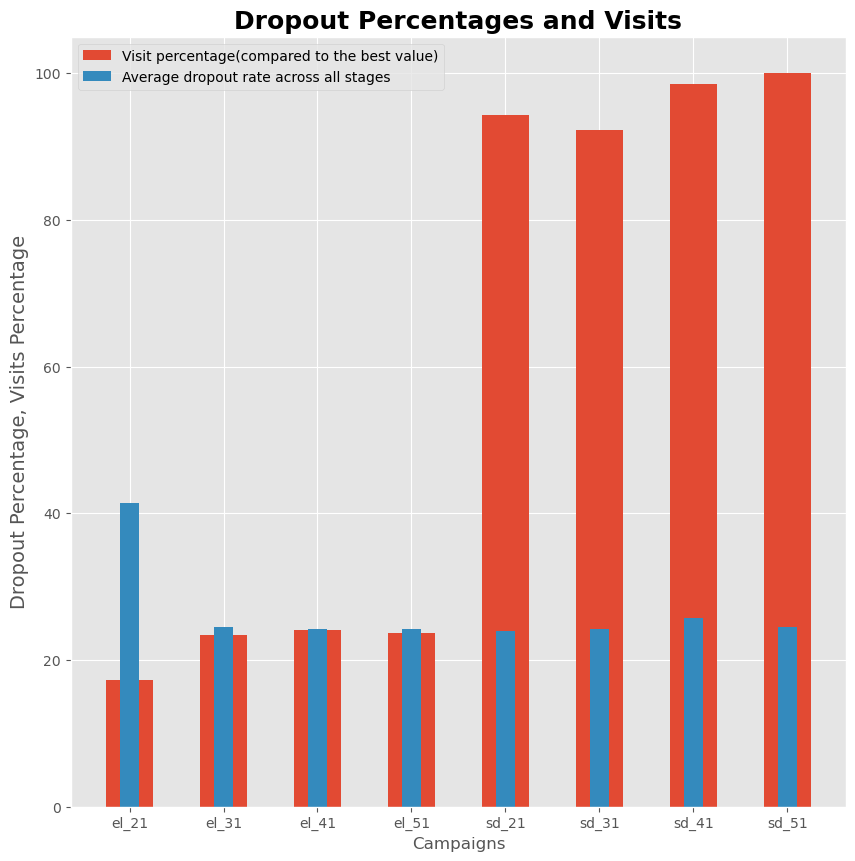

In [111]:

#plt.plot(np.transpose(stages),dropout_percent,linestyle='dotted',marker='.',markerfacecolor='r',markersize=10)
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.bar(campaigns,visits_mean, 0.5,label = 'Visit percentage(compared to the best value)')
plt.bar(campaigns,dropout_mean, 0.2,label = 'Average dropout rate across all stages')

plt.title('Dropout Percentages and Visits', fontsize=18, fontweight='bold')
avg_dropout = sum(dropout_percent) / len(dropout_percent)
#plt.axhline(avg_dropout, color='black', linestyle='--', linewidth=1, label='Average Dropout')
plt.legend(fontsize=10)

plt.ylabel('Dropout Percentage, Visits Percentage',fontsize=14)
plt.xlabel('Campaigns')

In [113]:
m

4291.218934911242